In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
# read the catapult and vivado csv files first and then 
# process data and make comparisons
cdfx = pd.read_csv("./catapult_sobely_latency.csv", index_col=0)
vdfx = pd.read_csv("./vivado_sobely.csv", index_col=0)
cdfx['throughput'] = vdfx['obj1'].min()*1/cdfx['obj1']
vdfx['throughput'] = vdfx['obj1'].min()*1/vdfx['obj1']
cdfx['ff_inv'] = 1/cdfx['ff']
vdfx['ff_inv'] = 1/vdfx['ff']
cdfx['lut_inv'] = 1/cdfx['lut']
vdfx['lut_inv'] = 1/vdfx['lut']
cdfx['1/obj2'] = (1/(cdfx['obj2']))/(1/vdfx['obj2'].min())
vdfx['1/obj2'] = (1/(vdfx['obj2']))/(1/vdfx['obj2'].min())
cdfx['clbUtil'] = cdfx['obj2']/147780
vdfx['clbUtil'] = vdfx['obj2']/147780
cdfx['mem_partition_size'] = cdfx['knob_dimx_part_factor']
vdfx['mem_partition_size'] = pd.to_numeric(2073600/(vdfx['knob_dimx_part_factor']*vdfx['knob_dimy_part_factor']), downcast='integer')
cdfx = cdfx.drop(columns=['knob_I_B'])
cdfx = cdfx.drop(columns=['knob_dimx_part_factor'])
vdfx = vdfx.drop(columns=['knob_dimx_part_factor'])
vdfx = vdfx.drop(columns=['knob_dimy_part_factor'])

Text(0.5, 1.0, 'Catapult df Design Space')

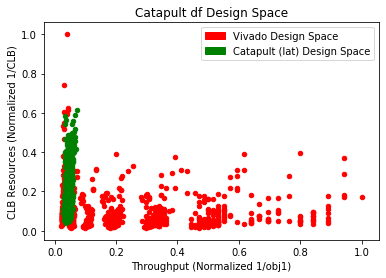

In [9]:
ax1 = vdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='r')
ax = cdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Vivado Design Space')
green_data = mpatches.Patch(color='green', label='Catapult (lat) Design Space')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput (Normalized 1/obj1)')
plt.ylabel('CLB Resources (Normalized 1/CLB)')
plt.title("Catapult df Design Space")

In [10]:
print("~~~~~~~~~~~ Area Optimized Designs Averages ~~~~~~~~~~~~\n")
print(cdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\n~~~~~~~~~~~ Latency Optimized Designs Averages ~~~~~~~~~~~~\n")
print(vdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~ Area Optimized Designs Averages ~~~~~~~~~~~~

knob_unroll_factor         4.500000
knob_subdim_y             10.500000
obj1                       0.355462
obj2                     428.272917
lut                     2546.189583
ff                       348.614583
dsp                        1.000000
bram                       0.000000
throughput                 0.046513
ff_inv                     0.003005
lut_inv                    0.000544
1/obj2                     0.215396
clbUtil                    0.002898
mem_partition_size    496454.400000
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~ Latency Optimized Designs Averages ~~~~~~~~~~~~

knob_unroll_factor         4.500000
knob_subdim_y             10.500000
obj1                       0.181142
obj2                    1316.631510
lut                     6633.839844
ff                      4755.687500
dsp                       52.856771
bram                       0.166667
throughput                 0.2

In [11]:
cdfx = cdfx.reset_index(drop=True)
vdfx = vdfx.reset_index(drop=True)
cv_df = pd.merge(cdfx, vdfx, on=['knob_unroll_factor','mem_partition_size', 'knob_subdim_y'], how='inner')
cv_df.count()

knob_unroll_factor    624
knob_subdim_y         624
obj1_x                624
obj2_x                624
lut_x                 624
ff_x                  624
dsp_x                 624
bram_x                624
throughput_x          624
ff_inv_x              624
lut_inv_x             624
1/obj2_x              624
clbUtil_x             624
mem_partition_size    624
obj1_y                624
obj2_y                624
lut_y                 624
ff_y                  624
dsp_y                 624
bram_y                624
throughput_y          624
ff_inv_y              624
lut_inv_y             624
1/obj2_y              624
clbUtil_y             624
dtype: int64

(0, 1)

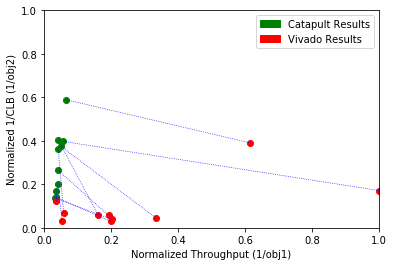

In [12]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample['1/obj2_x'], x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample['1/obj2_y'], x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['1/obj2_x'], row['1/obj2_y']],'b:',linewidth=0.7)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.ylim(0, 1)
plt.xlim(0, 1)

(0, 0.003)

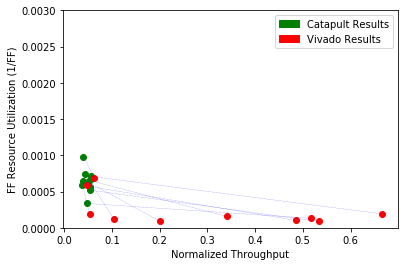

In [13]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample.lut_inv_x, x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample.lut_inv_y, x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['lut_inv_x'], row['lut_inv_y']],'b:',linewidth=0.3)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput')
plt.ylabel('FF Resource Utilization (1/FF)')
plt.ylim(0, 0.003)